A deep learning model to predict the chance of default for future loans using historical data

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data


Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model




steps:
   loading the dataset,
   checking for null values,
   analyzing the target variable's imbalance,
   balancing the dataset,
   plotting the data,
   encoding features,
   building a deep learning model, and
   calculating sensitivity and ROC-AUC metrics.
The following code coveres: data loading, preprocessing, model training, and evaluation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
Null Values in Dataset:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Null Values After Imputation:
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT  

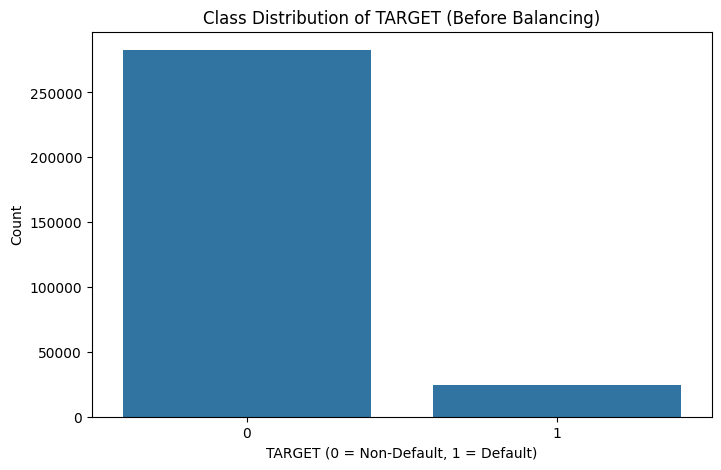

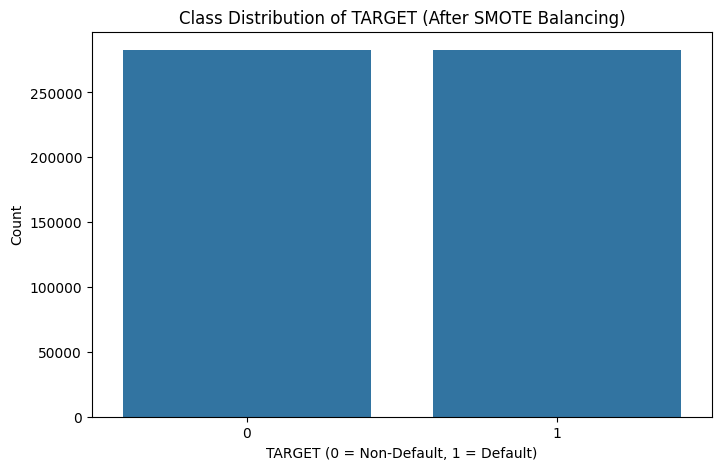

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - Precision: 0.7960 - Recall: 0.7518 - accuracy: 0.7781 - auc_1: 0.8540 - loss: 0.4708 - val_Precision: 0.8564 - val_Recall: 0.8481 - val_accuracy: 0.8534 - val_auc_1: 0.9283 - val_loss: 0.3580
Epoch 2/100
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - Precision: 0.8711 - Recall: 0.8142 - accuracy: 0.8469 - auc_1: 0.9206 - loss: 0.3539 - val_Precision: 0.8736 - val_Recall: 0.8488 - val_accuracy: 0.8635 - val_auc_1: 0.9349 - val_loss: 0.3345
Epoch 3/100
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - Precision: 0.8814 - Recall: 0.8207 - accuracy: 0.8552 - auc_1: 0.9275 - loss: 0.3367 - val_Precision: 0.8872 - val_Recall: 0.8441 - val_accuracy: 0.8688 - val_auc_1: 0.9392 - val_loss: 0.3139
Epoch 4/100
11308/11308 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - Precision: 0.8898 - Recall: 0.8245 - accuracy: 0.8613 - auc_1: 0.9318 - loss: 0.3247 - val_Precision: 0.8948 - val_Recall: 0.8483 - val_accuracy: 0.8748 - val_auc_1: 0.9432 - val_loss:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import io

# Step 1: Load the dataset
# # Upload the CSV file in Colab
# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['test_loan_data.csv']))
df = pd.read_csv('/content/loan_data.csv')
df.info()
df.describe()

# Step 2: Check for null values
print("Null Values in Dataset:")
print(df.isnull().sum())

# Handle missing values
# Numerical columns: impute with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Categorical columns: impute with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nNull Values After Imputation:")
print(df.isnull().sum())

# Step 3: Print percentage of default to non-default in TARGET column
default_counts = df['TARGET'].value_counts()
default_percentage = (default_counts[1] / len(df)) * 100
non_default_percentage = (default_counts[0] / len(df)) * 100
print(f"\nPercentage of Default (TARGET=1): {default_percentage:.2f}%")
print(f"Percentage of Non-Default (TARGET=0): {non_default_percentage:.2f}%")

# Plot original class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=df)
plt.title('Class Distribution of TARGET (Before Balancing)')
plt.xlabel('TARGET (0 = Non-Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

# Step 4: Balance the dataset using SMOTE
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Encode categorical variables before SMOTE
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for easier handling
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='TARGET')

# Step 5: Plot balanced data
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.title('Class Distribution of TARGET (After SMOTE Balancing)')
plt.xlabel('TARGET (0 = Non-Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

# Step 6: Encode columns (already done for categorical cols before SMOTE)
# Scale numerical features
numerical_cols_no_target = numerical_cols.drop('TARGET', errors='ignore')
X_resampled[numerical_cols_no_target] = scaler.fit_transform(X_resampled[numerical_cols_no_target])


# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Build deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', tf.keras.metrics.AUC()])

# Compute class weights for imbalanced training
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, class_weight=class_weight_dict,
                    callbacks=[early_stopping], verbose=1)

# Step 7: Calculate sensitivity (recall)
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print(f"\nSensitivity (Recall): {sensitivity:.4f}")

# Step 8: Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict(X_test))
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Additional: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()